In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Flatten

In [2]:
from tensorflow.keras.preprocessing.image import load_img

In [3]:
#Fetch Images count from Fodlers
count = 0 
dirs = os.listdir('Images/')
for dir in dirs:
    files = list(os.listdir('Images/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')

ashoka Folder has 81 Images
camphor Folder has 66 Images
kamakasturi Folder has 67 Images
kepala Folder has 76 Images
Turmeric Folder has 39 Images
Images Folder has 329 Images


In [4]:
#basic Parameter
base_dir = 'Images/'
img_size = 180
batch = 32

In [5]:
#load Images into Arrays as Dataset
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 329 files belonging to 5 classes.
Using 264 files for training.
Found 329 files belonging to 5 classes.
Using 65 files for validation.


In [6]:
leaf_names = train_ds.class_names
leaf_names

['Turmeric', 'ashoka', 'camphor', 'kamakasturi', 'kepala']

In [7]:
import matplotlib.pyplot as plt

In [8]:
import tensorflow as tf

# Assuming train_ds and val_ds are your datasets
def resize_images(image, label):
    image = tf.image.resize(image, [180, 180])  # Resize images to 224x224
    return image, label

# Apply the resizing function to your datasets
train_ds = train_ds.map(resize_images)
val_ds = val_ds.map(resize_images)

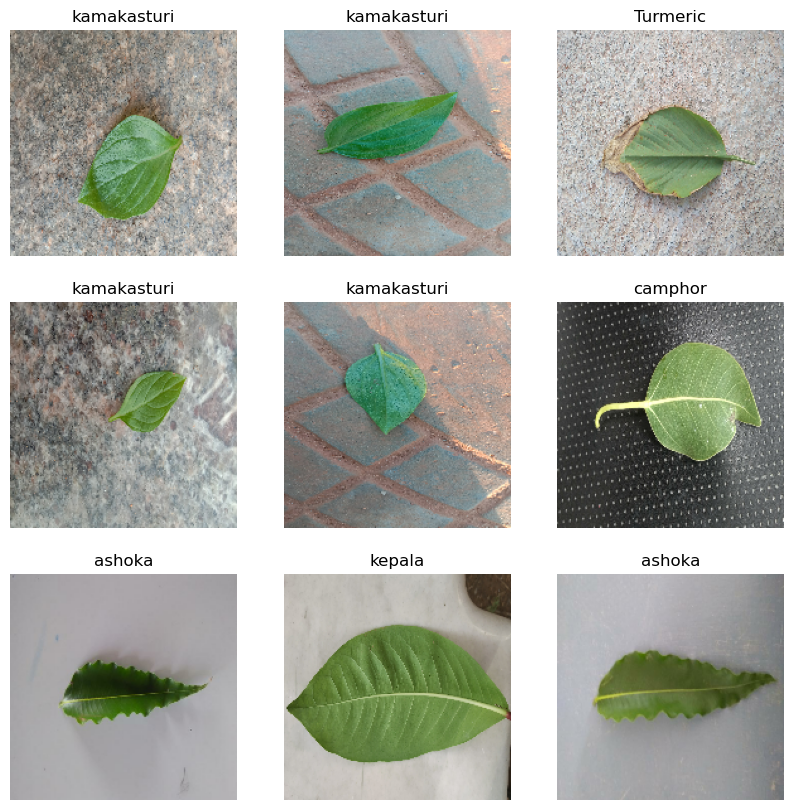

In [9]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(leaf_names[labels[i]])
        plt.axis('off')

In [10]:
#cashy memory
AUTOTUNE = tf.data.AUTOTUNE

In [11]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [12]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [13]:
#Data Augmentation [conver 1 images into multiple images by rendom zoming and flip]
from tensorflow.keras.models import Sequential
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

C:\Users\tejal\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


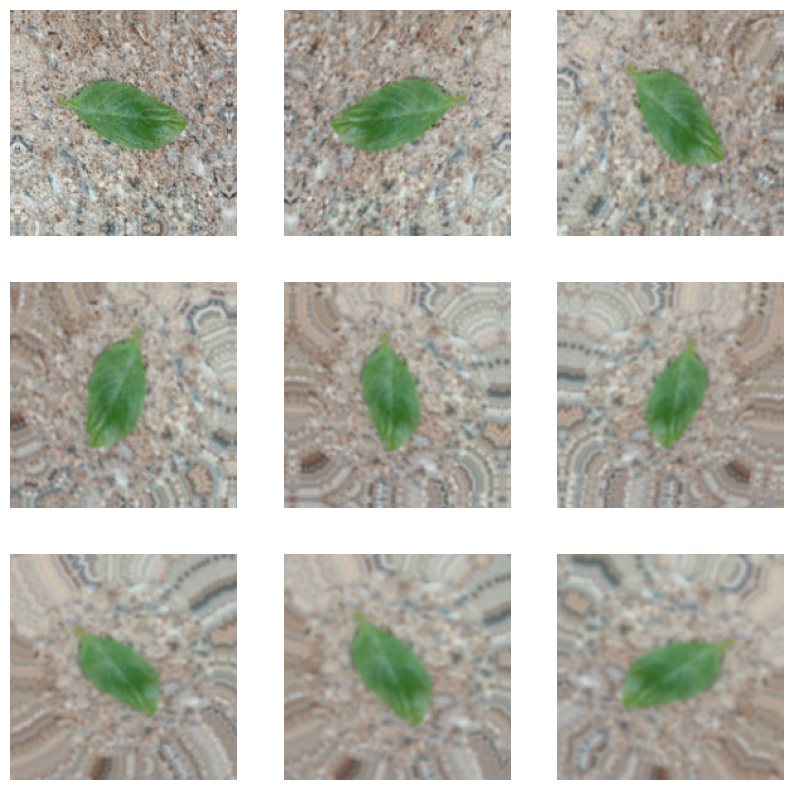

In [14]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [15]:
#MOdel Creation
from tensorflow.keras.layers import MaxPooling2D
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.1904 - loss: 2.4735 - val_accuracy: 0.1846 - val_loss: 1.6083
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 389ms/step - accuracy: 0.2857 - loss: 1.5916 - val_accuracy: 0.2308 - val_loss: 1.6180
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 632ms/step - accuracy: 0.3411 - loss: 1.5431 - val_accuracy: 0.2462 - val_loss: 1.5357
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 344ms/step - accuracy: 0.3851 - loss: 1.4413 - val_accuracy: 0.3692 - val_loss: 1.2959
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 587ms/step - accuracy: 0.4425 - loss: 1.2699 - val_accuracy: 0.5231 - val_loss: 1.0867
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 564ms/step - accuracy: 0.6183 - loss: 1.0030 - val_accuracy: 0.6769 - val_loss: 0.9410
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 581ms/step - accuracy: 0.6469 - loss: 0.9620 - val_accuracy: 0.7538 - val_loss: 0.7938
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 587ms/step - accuracy: 0.6446 - loss: 0.8919 - val_accuracy: 0.8308 - val_loss: 0

In [21]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + leaf_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [22]:
classify_images('C:\\Users\\tejal\\Downloads\\Sample\\camphor.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


'The Image belongs to camphor with a score of 60.600411891937256'

In [23]:
model.save('Leaf_Recog_Model.keras')
